# Australian Skill Classification

In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Skills Classification/australian-skills-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Skills Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Core_competencies.csv")

In [5]:
df.head()

,ANZSCO_Code,ANZSCO_Title,Core_Competencies,Score,Proficiency_level,Anchor_value
0,1111,Chief Executives and Managing Directors,Numeracy,6,Intermediate,Calculate the square footage of a new home und...
1,1111,Chief Executives and Managing Directors,Digital engagement,6,Intermediate,Use software on a portable device to document ...
2,1111,Chief Executives and Managing Directors,Teamwork,7,Intermediate,"Share knowledge, experience, information and r..."
3,1111,Chief Executives and Managing Directors,Writing,7,Intermediate,Write a detailed literature review
4,1111,Chief Executives and Managing Directors,Reading,8,High,Read and analyse information comparing the imp...


In [6]:
df.shape

(6000, 6)

In [7]:
df.size

36000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANZSCO_Code        6000 non-null   int64 
 1   ANZSCO_Title       6000 non-null   object
 2   Core_Competencies  6000 non-null   object
 3   Score              6000 non-null   int64 
 4   Proficiency_level  6000 non-null   object
 5   Anchor_value       6000 non-null   object
dtypes: int64(2), object(4)
memory usage: 281.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ANZSCO_Code,6000.0,253376.640,248999.490513,1111.0,5614.75,233914.5,369686.75,899923.0
Score,6000.0,5.981,1.507764,1.0,5.00,6.0,7.00,10.0


In [10]:
df.isnull().sum()

ANZSCO_Code          0
ANZSCO_Title         0
Core_Competencies    0
Score                0
Proficiency_level    0
Anchor_value         0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

ANZSCO_Code          600
ANZSCO_Title         600
Core_Competencies     10
Score                 10
Proficiency_level      3
Anchor_value          77
dtype: int64

## Data Preprocessing

In [14]:
df = df.pivot(index='ANZSCO_Title', columns='Core_Competencies', values='Score')
df = df.reset_index()
df['Total Score'] = df.iloc[:, 1:].sum(axis=1)  

In [22]:
X = df.drop(columns=['ANZSCO_Title'])
y = df['ANZSCO_Title']

In [23]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [24]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [26]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479], got ['Accountant (General)' 'Accounts Clerk' 'Actuary' 'Acupuncturist'
 'Admissions Clerk' 'Advertising and Marketing Professionals'
 'Aeronautical Engineer' 'Aeroplane Pilot'
 'Agricultural and Forestry Scientists'
 'Agricultural and Horticultural Mobile Plant Operator'
 'Air Traffic Controller' 'Air Transport Professionals'
 'Airconditioning and Refrigeration Mechanics'
 'Aircraft Maintenance Engineer (Avionics)'
 'Aircraft Maintenance Engineer (Mechanical)'
 'Ambulance Officers and Paramedics'
 'Amusement, Fitness and Sports Centre Managers' 'Anaesthetic Technician'
 'Anaesthetists' 'Analyst Programmer' 'Arborist' 'Architect'
 'Architectural Draftsperson' 'Archivist' 'Audiologist' 'Author'
 'Autoglazier' 'Automobile Drivers' 'Automotive Electricians'
 'Backhoe Operator' 'Bakers and Pastrycooks' 'Bank Workers' 'Barista'
 'Barristers' 'Beauty Therapists' 'Betting Clerks' 'Bicycle Mechanic'
 'Biochemist' 'Biomedical Engineer' 'Biotechnologist'
 'Boat Builders and Shipwrights' 'Boiler or Engine Operator'
 'Book or Script Editor' 'Bookkeepers' 'Botanist' 'Bricklayer'
 'Broadcast Transmitter Operator' 'Building Associate'
 'Building Inspector' 'Building Insulation Installer'
 'Bulk Materials Handling Plant Operator' 'Bus and Coach Drivers'
 'Business Machine Mechanic' 'Cabinetmakers' 'Cafe Workers'
 'Cafe and Restaurant Managers' 'Call or Contact Centre Manager'
 'Call or Contact Centre Operator' 'Call or Contact Centre Team Leader'
 'Car Detailers' 'Careers Counsellor' 'Caretakers' 'Chemical Plant Worker'
 'Chief Information Officer' 'Child Care Centre Managers'
 'Chiropractors and Osteopaths' 'Civil Engineer'
 'Civil Engineering Draftsperson'
 'Clay, Concrete, Glass and Stone Processing Machine Operators'
 'Clinical Coder' 'Clinical Psychologist' 'Clothing Patternmaker'
 'Commercial Cleaners' 'Commodities Trader' 'Communications Operator'
 'Community Worker' 'Complementary Health Therapists' 'Composer'
 'Concrete Pump Operator' 'Concreters' 'Conservation Officer'
 'Conservator' 'Construction Estimator' 'Construction Managers'
 'Conveyancers and Legal Executives' 'Cooks' 'Copywriter'
 'Corporate Services Managers' 'Corporate Treasurer' 'Cost Clerk'
 'Counsellors' 'Court and Legal Clerks' 'Crane Chaser'
 'Crane, Hoist and Lift Operators' 'Credit and Loans Officers'
 'Crop Farm Workers' 'Crossing Supervisor' 'Customer Service Manager'
 'Customs Officer' 'Dance Teacher (Private Tuition)'
 'Dancer or Choreographer' 'Data Entry Operator' 'Database Administrator'
 'Debt Collectors' 'Delivery Drivers' 'Dental Assistants'
 'Dental Practitioners' 'Dental Therapist' 'Dermatologist'
 'Developer Programmer' 'Diagnostic and Interventional Radiologist'
 'Diesel Motor Mechanic' 'Disabilities Services Officer' 'Diver'
 'Diversional Therapists' 'Domestic Cleaners' 'Drainer'
 'Dressmaker or Tailor' 'Driller' "Driller's Assistant"
 'Driving Instructors' 'Drug and Alcohol Counsellor'
 'Earth Science Technician' 'Earthmoving Plant Operator (General)'
 'Economists' 'Education Advisers and Reviewers' 'Education Aides'
 'Educational Psychologist' 'Electrical Distribution Trades Workers'
 'Electrical Engineering Technician'
 'Electrical or Telecommunications Trades Assistant' 'Electricians'
 'Electronic Engineering Draftspersons and Technicians'
 'Electronic Equipment Trades Worker'
 'Electronic Instrument Trades Worker (General)' 'Electronics Engineers'
 'Emergency Medicine Specialist' 'Emergency Service Worker'
 'Engineering Managers' 'Engineering Patternmaker'
 'Engineering Technologist' 'Enrolled Nurse'
 'Entertainer or Variety Artist' 'Environmental Consultant'
 'Environmental Manager' 'Excavator Operator' 'External Auditor'
 'Facilities Administrator' 'Facilities Manager' 'Faculty Head'
 'Family Support Worker' 'Family and Marriage Counsellor'
 'Fast Food Cooks' 'Fencers' 'Filing and Registry Clerks'
 'Film and Video Editor' 'Film, Television, Radio and Stage Directors'
 'Financial Brokers' 'Financial Dealers'
 'Financial Institution Branch Manager' 'Financial Investment Adviser'
 'Financial Investment Manager' 'Fire Fighter' 'Fishing Hand'
 'Fitness Instructors' 'Florists' 'Food Trades Assistants'
 'Food and Drink Factory Workers' 'Forestry Worker' 'Forklift Drivers'
 'Freight and Furniture Handlers' 'Furniture Finisher'
 'Gallery or Museum Curator' 'Gallery or Museum Technician'
 'Gallery, Museum and Tour Guides' 'Gaming Workers'
 'Garden and Nursery Labourers' 'Gardeners' 'Gas or Petroleum Operator'
 'Gasfitter' 'General Managers' 'General Practitioner'
 'Geologists, Geophysicists and Hydrogeologists' 'Geotechnical Engineer'
 'Glaziers' 'Graphic Pre-press Trades Workers' 'Greenkeepers'
 'Hairdressers' 'Handypersons' 'Hardware Technician'
 'Health Information Manager' 'Health Practice Manager'
 'Health Promotion Officer' 'Historian' 'Home Improvement Installer'
 'Hospital Pharmacist' 'Hotel Service Managers' 'Hotel and Motel Managers'
 'Hotel or Motel Receptionist' 'Housekeepers' 'Human Resource Adviser'
 'Human Resource Clerks' 'Human Resource Managers'
 'ICT Business and Systems Analysts' 'ICT Managers'
 'ICT Quality Assurance Engineer' 'ICT Sales Professionals'
 'ICT Security Specialist' 'ICT Support Engineer'
 'ICT Systems Test Engineer' 'ICT Trainers' 'Illustrator'
 'Importers, Exporters and Wholesalers' 'Indigenous Health Workers'
 'Industrial Designer' 'Industrial Engineer' 'Industrial Spraypainters'
 'Information Officers' 'Insurance Agents' 'Insurance Consultant'
 'Insurance Investigators, Loss Adjusters and Risk Surveyors'
 'Integration Aide' 'Interior Designers' 'Internal Auditor' 'Jewellers'
 'Journalists and Other Writers' 'Judicial and Other Legal Professionals'
 'Kitchenhands' 'Laboratory Manager' 'Lagger'
 'Land Economists and Valuers' 'Landscape Architect' 'Laundry Workers'
 'Leaflet or Newspaper Deliverer' 'Legal Secretary' 'Liaison Officer'
 'Librarians' 'Library Assistants' 'Licensed Club Managers'
 'Life Science Technician' 'Life Scientist (General)' 'Lift Mechanic'
 'Livestock Farm Workers' 'Livestock Farmers' 'Loader Operator'
 'Locksmith' 'Logging Assistant' 'Mail Clerk' 'Make Up Artist'
 'Management Accountant' 'Management Consultant' 'Marketing Specialist'
 'Massage Therapists' 'Materials Engineer' 'Materials Recycler'
 'Mathematician' 'Meat Boner and Slicer'
 'Meat, Poultry and Seafood Process Workers' 'Mechanical Engineer'
 'Mechanical Engineering Draftsperson' 'Mechanical Engineering Technician'
 'Media Producer (excluding Video)' 'Medical Diagnostic Radiographer'
 'Medical Laboratory Technician' 'Medical Radiation Therapist'
 'Medical Receptionist'
 'Metal Casting, Forging and Finishing Trades Workers' 'Metal Fabricator'
 'Metallurgist' 'Meteorologist' 'Meter Reader' 'Microbiologist' 'Midwives'
 'Miner' 'Mining Engineer (excluding Petroleum)' 'Mining Support Worker'
 'Ministers of Religion' 'Mixed Crop and Livestock Farm Workers'
 'Mixed Crop and Livestock Farmers' 'Model' 'Motion Picture Projectionist'
 'Motor Mechanic (General)' 'Motor Vehicle Parts Interpreter'
 'Motor Vehicle Parts and Accessories Fitters'
 'Motor Vehicle or Caravan Salesperson' 'Motorcycle Mechanic'
 'Multimedia Specialist' 'Music Teacher (Private Tuition)'
 'Musical Instrument Maker or Repairer' 'Musician (Instrumental)'
 'Naturopath' 'Naval Architect' 'Network Analyst' 'Neurologist'
 'Nuclear Medicine Technologist' 'Nurserypersons' 'Nursing Support Worker'
 'Obstetrician and Gynaecologist' 'Occupational Health and Safety Adviser'
 'Occupational Therapists' 'Office Managers'
 'Operating Theatre Technician' 'Ophthalmologist' 'Optical Dispenser'
 'Optometrist' 'Order Clerk' 'Organisation and Methods Analyst'
 'Organisational Psychologist' 'Orthoptist' 'Orthotist or Prosthetist'
 'Other Education Managers' 'Other Factory Process Workers'
 'Outdoor Adventure Guides' 'Packers' 'Paediatrician'
 'Painting Trades Workers' 'Panelbeaters'
 'Paper and Wood Processing Machine Operators' 'Park Ranger'
 'Parking Inspector' 'Parole or Probation Officer' 'Pathology Collector'
 'Paving Plant Operator' 'Paving and Surfacing Labourers' 'Payroll Clerks'
 'Personal Assistants' 'Personal Care Assistant' 'Pest Controller'
 'Pet Groomer' 'Petroleum Engineer' 'Pharmacy Sales Assistants'
 'Pharmacy Technician' 'Photographers' 'Physicist'
 'Plastics and Rubber Production Machine Operators' 'Plumber (General)'
 'Podiatrists' 'Police Officer' 'Policy and Planning Managers'
 'Post Office Manager' 'Postal Delivery Officer'
 'Precision Instrument Maker and Repairer' 'Primary Products Inspectors'
 'Print Finisher' 'Printers' 'Private Investigator'
 'Private Tutors and Teachers' 'Product Examiner' 'Product Tester'
 'Production Clerk' 'Production Manager (Mining)'
 'Program or Project Administrator' 'Property Manager' 'Psychiatrists'
 'Public Relations Manager' 'Public Relations Professionals'
 'Purchasing Officer' 'Quality Assurance Manager' 'Quantity Surveyor'
 'Radio Despatcher' 'Radio Presenter' 'Railway Signal Operator'
 'Railway Track Workers' 'Real Estate Representative'
 'Receptionist (General)' 'Records Manager' 'Recreation Officer'
 'Recruitment Consultant' 'Recycling Worker'
 'Recycling and Rubbish Collectors' 'Registered Nurse (Aged Care)'
 'Registered Nurse (Child and Family Health)'
 'Registered Nurse (Community Health)'
 'Registered Nurse (Developmental Disability)'
 'Registered Nurse (Disability and Rehabilitation)'
 'Registered Nurse (Medical Practice)' 'Registered Nurse (Medical)'
 'Registered Nurse (Paediatrics)' 'Registered Nurse (Perioperative)'
 'Registered Nurse (Surgical)' 'Rehabilitation Counsellor'
 'Research and Development Managers' 'Resident Medical Officer'
 'Residential Care Officer' 'Retail Buyer'
 'Retail Loss Prevention Officer' 'Retail Managers' 'Retail Pharmacist'
 'Retail Supervisors' 'Road Roller Operator' 'Road Traffic Controller'
 'Roof Plumber' 'Roof Tilers' 'Sales Assistants (General)'
 'Sales Demonstrator' 'Sales Representatives' 'Scaffolder'
 'School Principals' 'Screen Printer' 'Secretary (General)'
 'Security Consultant' 'Security Officer' 'Sewing Machinists'
 'Sheetmetal Trades Workers' 'Shelf Fillers' "Ship's Master"
 "Ship's Officer" 'Shot Firer' 'Sign Erector' 'Signwriters' 'Slaughterer'
 'Small Engine Mechanic' 'Social Professionals' 'Social Workers'
 'Software Engineer' 'Software Tester' 'Solicitors' 'Solid Plasterer'
 'Sound Technician' 'Special Care Workers' 'Special Education Teachers'
 'Specialist Physicians' 'Speech Pathologist'
 'Sports Coaches, Instructors and Officials' 'Sports Umpire'
 'Sportspersons' 'Statistical Clerk' 'Statistician' 'Steel Fixer'
 'Sterilisation Technician' 'Stock Clerk'
 'Stone Processing Machine Operator' 'Stonemason' 'Storepersons'
 'Street Vendors and Related Salespersons' 'Structural Engineer'
 'Structural Steel Erector' 'Surveyors and Spatial Scientists'
 'Switchboard Operators' 'Systems Administrator' 'Taxation Accountant'
 'Taxation Inspector' 'Technical Sales Representatives'
 'Telecommunications Engineering Professionals'
 'Telecommunications Technical Specialists'
 'Telecommunications Trades Workers' 'Telemarketers'
 'Textile and Footwear Production Machine Operators' 'Therapy Aide'
 'Thoracic Medicine Specialist' 'Toolmaker' 'Train Driver' 'Translator'
 'Transport Engineer' 'Transport Operations Inspector'
 'Transport and Despatch Clerks' 'Travel Consultant' 'Tree Faller'
 'Truck Drivers' 'Tyre Fitter' 'University Tutor' 'Upholsterers'
 'Urban and Regional Planners' 'Valuer' 'Vehicle Painters'
 'Vending Machine Attendants' 'Veterinarians' 'Veterinary Nurses'
 'Visual Arts and Crafts Professionals' 'Visual Merchandisers'
 'Vocational Education Teachers' 'Waiters' 'Warehouse Administrator'
 'Waste Water or Water Plant Operator' 'Web Developer'
 'Welder (First Class)' 'Welfare Worker' 'Wine Maker'
 'Workplace Relations Adviser' 'Zoologist']

## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       327
           1       0.90      0.90      0.90       379

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706

Confusion Matrix:
 [[289  38]
 [ 37 342]]


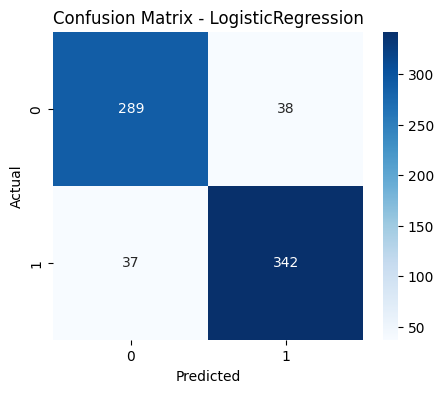

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       327
           1       0.89      0.94      0.92       379

    accuracy                           0.91       706
   macro avg       0.91      0.91      0.91       706
weighted avg       0.91      0.91      0.91       706

Confusion Matrix:
 [[284  43]
 [ 22 357]]


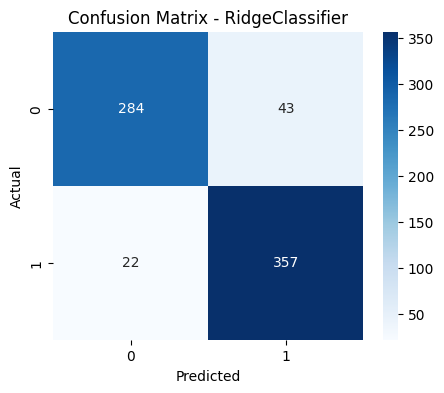

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       327
           1       0.90      0.91      0.90       379

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706

Confusion Matrix:
 [[287  40]
 [ 36 343]]


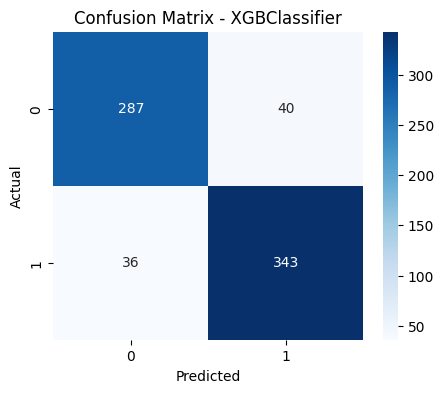

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       327
           1       0.88      0.84      0.86       379

    accuracy                           0.86       706
   macro avg       0.85      0.86      0.86       706
weighted avg       0.86      0.86      0.86       706

Confusion Matrix:
 [[284  43]
 [ 59 320]]


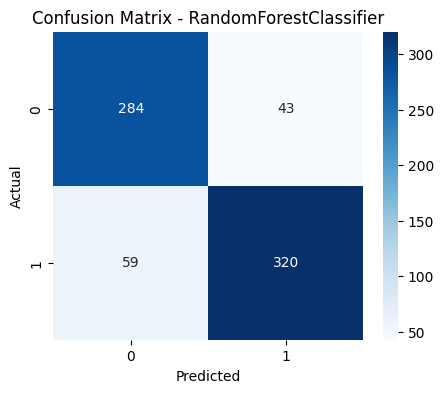

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       327
           1       0.88      0.95      0.91       379

    accuracy                           0.90       706
   macro avg       0.91      0.90      0.90       706
weighted avg       0.90      0.90      0.90       706

Confusion Matrix:
 [[276  51]
 [ 19 360]]


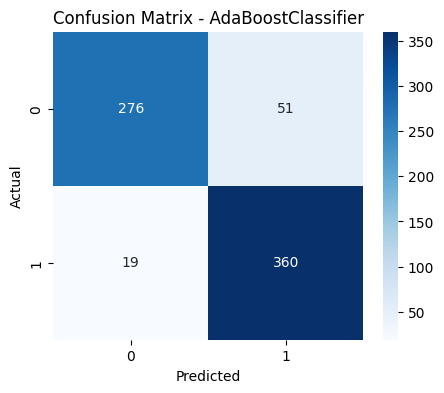

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       327
           1       0.91      0.93      0.92       379

    accuracy                           0.91       706
   macro avg       0.91      0.91      0.91       706
weighted avg       0.91      0.91      0.91       706

Confusion Matrix:
 [[290  37]
 [ 25 354]]


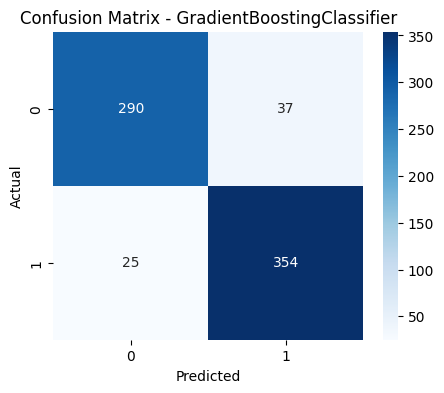

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       327
           1       0.88      0.83      0.85       379

    accuracy                           0.85       706
   macro avg       0.85      0.85      0.85       706
weighted avg       0.85      0.85      0.85       706

Confusion Matrix:
 [[284  43]
 [ 65 314]]


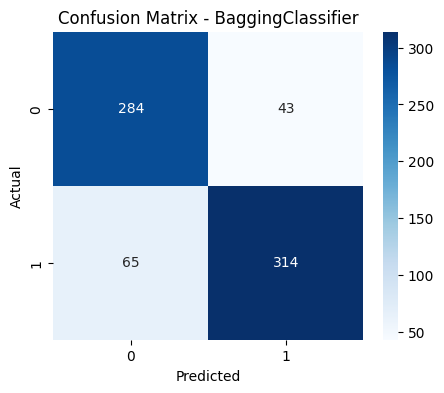

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       327
           1       0.87      0.81      0.84       379

    accuracy                           0.83       706
   macro avg       0.83      0.83      0.83       706
weighted avg       0.84      0.83      0.83       706

Confusion Matrix:
 [[281  46]
 [ 72 307]]


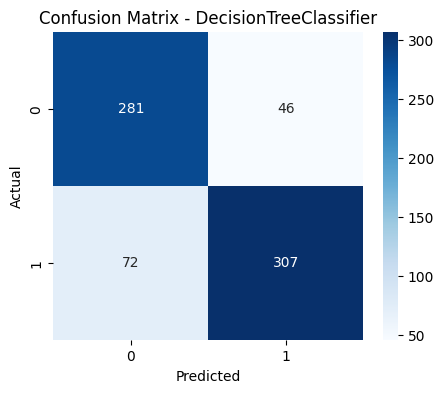

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       327
           1       0.90      0.94      0.92       379

    accuracy                           0.91       706
   macro avg       0.91      0.91      0.91       706
weighted avg       0.91      0.91      0.91       706

Confusion Matrix:
 [[289  38]
 [ 23 356]]


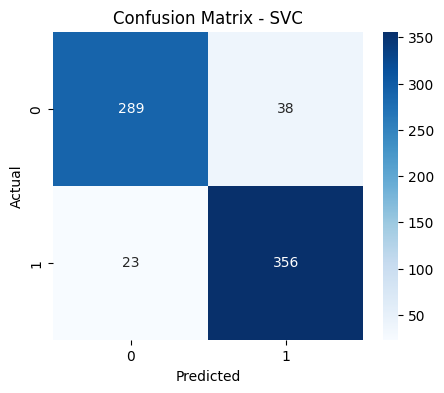

In [ ]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()